In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [119]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

In [3]:
import datetime
import scikitplot as skplt
import yellowbrick

C:\Users\ARASH-FEA\.conda\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df = pd.read_csv('member_sample.csv', index_col=0)
df_c = df.copy()

In [5]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21344 entries, 0 to 99998
Columns: 112 entries, Individual Key to Was Towed To AAR Referral
dtypes: float64(35), object(77)
memory usage: 18.4+ MB


In [6]:
df_c.head()

,Individual Key,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,...,SC Vehicle Manufacturer Name,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral
0,10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0
2,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0
3,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0
4,52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,N,Y,N,...,TOYOTA,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0


In [7]:
nulls = df_c.isnull().sum()

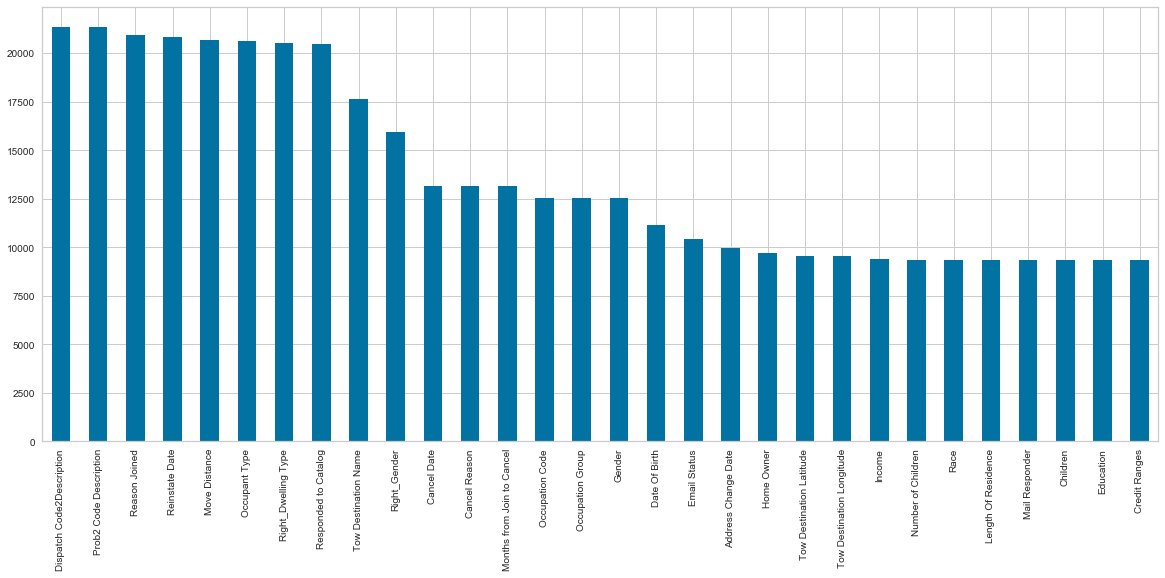

In [8]:
nulls.nlargest(30).plot(kind='bar', figsize = (20,8))

In [9]:
# remove canceld members who does not have 'ERS ENT COUNT' from DataFrame
df_c['Member Status'].value_counts(dropna=False)

ACTIVE       11808
CANCELLED     8177
PENDING       1358
NaN              1
Name: Member Status, dtype: int64

In [10]:
df_c[df_c['Member Status'] == 'CANCELLED'].shape

(8177, 112)

In [11]:
df_c['ERS ENT Count Year 3'].value_counts(dropna=False)

0.0    8658
NaN    4669
1.0    3873
2.0    1925
3.0    1127
4.0     732
5.0     254
6.0      70
7.0      21
9.0      15
Name: ERS ENT Count Year 3, dtype: int64

In [12]:
df_c = df_c.dropna(how='any', subset=['ERS ENT Count Year 3'])
df_c.info()
df_c['Member Status'].value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16675 entries, 1 to 99998
Columns: 112 entries, Individual Key to Was Towed To AAR Referral
dtypes: float64(35), object(77)
memory usage: 14.4+ MB


ACTIVE       11808
CANCELLED     3509
PENDING       1358
Name: Member Status, dtype: int64

In [13]:
df_c['ERS Member Cost Year 3'].value_counts(dropna=False)

0.00      8636
53.00     1521
106.00     539
58.85      532
32.50      276
          ... 
33.95        1
82.71        1
120.70       1
68.80        1
263.00       1
Name: ERS Member Cost Year 3, Length: 579, dtype: int64

In [14]:
# use 'unknown' for all missing values in df ===> No. that's not a good idea.
#df_c['Income'].value_counts(dropna=False)

In [15]:
#df_c.info()

In [16]:
#df_c['Income'].fillna('unknown', inplace = True)
#df_c = df_c[df_c['Income'].astype(bool)]
#df_c['Income'].astype(bool).value_counts()
#df_c.info()

In [17]:
#df_c['Income'].value_counts(dropna=False)

In [18]:
#df_c['Income'].head(50)

In [19]:
#df_c.fillna('unknown', inplace = True)

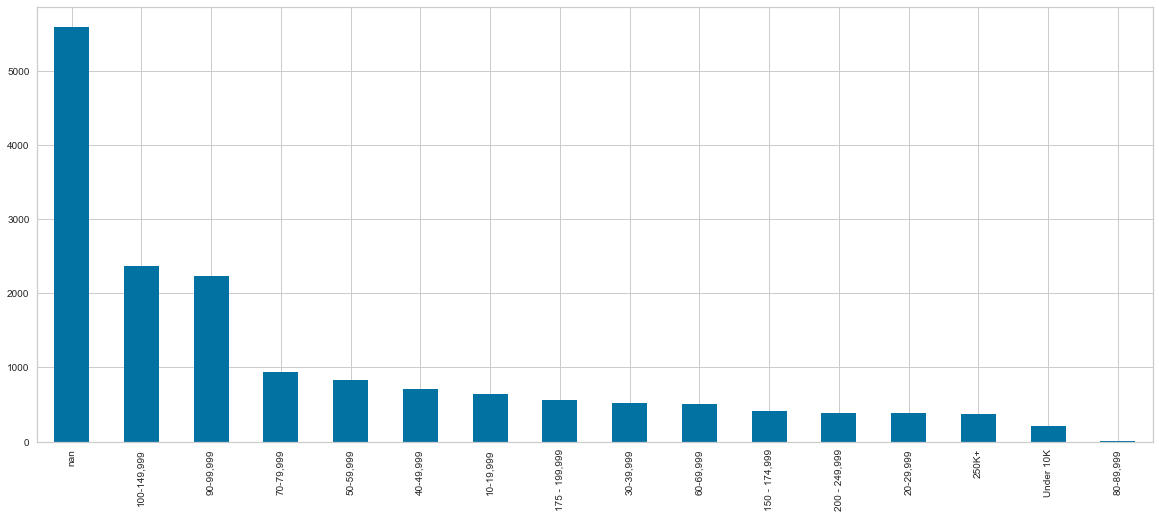

In [22]:
df_c['Income'].value_counts(dropna=False).plot(kind='bar', figsize = (20,8))

In [39]:
df_c['Household Key'].shape

(16675,)

In [40]:
df_c['Household Key'].value_counts(dropna=False)
df_c['Household Key'].dropna().shape

(16675,)

In [41]:
df_c['Income'].shape

(16675,)

In [42]:
df_c['Income'].dropna().shape

(11090,)

In [43]:
df_c['Income'].shape

(16675,)

In [44]:
d1 = df_c[df_c['Household Key'] == 4404559.0]
d1[['Individual Key', 'Household Key', 'Income']].dropna()

,Individual Key,Household Key,Income
62881,2460125.0,4404559.0,"20-29,999"
62882,2460125.0,4404559.0,"20-29,999"
62883,2460125.0,4404559.0,"20-29,999"
62884,2460125.0,4404559.0,"20-29,999"
62885,2460125.0,4404559.0,"20-29,999"
62886,2460125.0,4404559.0,"20-29,999"
62887,2460125.0,4404559.0,"20-29,999"
62888,2460125.0,4404559.0,"20-29,999"
62899,2460127.0,4404559.0,Under 10K
62900,2460127.0,4404559.0,Under 10K


In [45]:
# The income is for individual. Try to find out household income.

In [46]:
df_c[['Income', 'Education']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16675 entries, 1 to 99998
Data columns (total 2 columns):
Income       11090 non-null object
Education    11152 non-null object
dtypes: object(2)
memory usage: 390.8+ KB


In [47]:
df_c[['Income', 'Education']].dropna()

,Income,Education
1,"30-39,999",Some College
2,"30-39,999",Some College
3,"30-39,999",Some College
4,"30-39,999",Some College
5,"30-39,999",Some College
...,...,...
99989,"100-149,999",Some College
99992,"100-149,999",Unknown
99996,"90-99,999",High School
99997,"90-99,999",High School


In [49]:
df_c['Income'].value_counts(dropna=False)

NaN              5585
100-149,999      2365
90-99,999        2236
70-79,999         938
50-59,999         831
40-49,999         715
10-19,999         636
175 - 199,999     565
30-39,999         524
60-69,999         503
150 - 174,999     409
200 - 249,999     387
20-29,999         386
250K+             367
Under 10K         215
80-89,999          13
Name: Income, dtype: int64

In [50]:
df_c['Education'].value_counts(dropna=False)

NaN                  5523
Unknown              3843
Some College         2877
High School          2719
Completed College    1541
Graduated School      172
Name: Education, dtype: int64

In [51]:
d2 = df_c[df_c['Income'] == '100-149,999']
d3 = df_c[['Income', 'Education']]
#d3.groupby('Income').head(30)

In [52]:
def income_brackets(x):
    if x in ['Under 10K', '10-19,999', '20-29,999', '30-39,999', '40-49,999']:
        return 1
    elif x in ['50-59,999', '60-69,999', '70-79,999', '80-89,999', '90-99,999']:
        return 2
    elif x in ['100-149,999']:
        return 3
    elif x in ['150 - 174,999', '175 - 199,999']:
        return 4
    elif x in ['200 - 249,999']:
        return 5
    elif x in ['250K+']:
        return 6
    else:
        return np.nan

In [53]:
df_c['Income'] = df_c['Income'].apply(income_brackets)

In [54]:
#df_c['income2'] = df['Income']
#df_c[['Household Key', 'Income', 'income2']].head(50)
# works fine

In [55]:
def education_brackets(x):
    if x == 'High School':
        return 1
    elif x == 'Some College':
        return 2
    elif x == 'Completed College':
        return 3
    elif x == 'Graduated School':
        return 4
    else:
        return np.nan

In [56]:
df_c['Education'] = df_c['Education'].apply(education_brackets)

In [57]:
#df_c['Education2'] = df['Education']
#df_c[['Household Key', 'Education', 'Education2']].head(200)
#df_c['Education'].value_counts()
# works fine.

In [59]:
df_c['Credit Ranges'].value_counts(dropna=False)

NaN           5523
750-799       3753
700-749       2348
650-699       1786
800+          1695
600-649        840
Unknown        381
550-599        186
500-549        153
499 & Less      10
Name: Credit Ranges, dtype: int64

In [60]:
def credit_brackets(x):
    if x in ['499 & Less', '500-549']:
        return 1
    elif x in ['550-599', '600-649']:
        return 2
    elif x in ['650-699', '700-749']:
        return 3
    elif x in ['750-799', '800+']:
        return 4
    else:
        return np.nan

In [61]:
df_c['Credit Ranges'] = df_c['Credit Ranges'].apply(credit_brackets)

In [62]:
#df_c['Credit Ranges2'] = df['Credit Ranges']
#df_c[['Household Key', 'Credit Ranges', 'Credit Ranges2']].head(600)
#df_c['Credit Ranges'].value_counts()
# works fine.

In [ ]:
#df['Date Of Birth'].value_counts(dropna=False)        ===> 11153 NAN
#df['Birth Date MMDDYYYY'].value_counts(dropna=False)  ===> 3250 NAN
# second database is more complete. So I have to replace it.

In [63]:
#df_c['Age'] = 2020 - pd.to_datetime(df['Date Of Birth']).dt.year
#df_c['Age'].value_counts(dropna=False)

NaN      7117
73.0      516
71.0      362
74.0      358
72.0      347
         ... 
24.0       17
26.0       17
100.0      14
23.0       11
22.0        4
Name: Age, Length: 80, dtype: int64

In [110]:
df_c['Age'] = 2020 - pd.to_datetime(df['Birth Date MMDDYYYY']).dt.year
df_c['Age'].value_counts(dropna=False)

73.0     638
NaN      595
71.0     546
74.0     543
72.0     492
        ... 
23.0      11
22.0       6
105.0      1
18.0       1
110.0      1
Name: Age, Length: 88, dtype: int64

In [111]:
df_c['Age'].describe()
# Age works fine

count    16080.000000
mean        69.799440
std         18.013515
min         18.000000
25%         62.000000
50%         73.000000
75%         83.000000
max        110.000000
Name: Age, dtype: float64

In [65]:
def child_converter(x): return num_child_dict[x]
num_child_dict = {'No children':0,
                 'One Child':1,
                 'Two Children':2,
                 'Three Children':3,
                 'Four Children':4,
                 'Five Children':5,
                 'Six Children':6,
                 np.nan:np.nan}

In [66]:
df_c['Number of Children'] = df_c['Number of Children'].apply(child_converter)

In [67]:
#df_c['Number of Children'].value_counts(dropna=False)
#df['Number of Children'].value_counts(dropna=False)
# Number of children works fine

In [68]:
def y_n_to_binary(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 0
    else:
        return np.nan

In [69]:
fsvs = [col for col in df_c.columns if col.startswith('FSV')]
#df_c[fsvs]

In [70]:
df_c['FSV CMSI Flag'].value_counts(dropna=False)

N    15793
Y      882
Name: FSV CMSI Flag, dtype: int64

In [71]:
df_c['FSV Credit Card Flag'].value_counts(dropna=False)

N    15447
Y     1228
Name: FSV Credit Card Flag, dtype: int64

In [72]:
df_c['FSV Deposit Program Flag'].value_counts(dropna=False)

N    16629
Y       46
Name: FSV Deposit Program Flag, dtype: int64

In [73]:
df_c['FSV Home Equity Flag'].value_counts(dropna=False)

N    16668
Y        7
Name: FSV Home Equity Flag, dtype: int64

In [74]:
df_c['FSV ID Theft Flag'].value_counts(dropna=False)

N    16191
Y      484
Name: FSV ID Theft Flag, dtype: int64

In [75]:
df_c['FSV Mortgage Flag'].value_counts(dropna=False)

N    16649
Y       26
Name: FSV Mortgage Flag, dtype: int64

In [76]:
for col in fsvs:
        df_c[col] = df_c[col].apply(y_n_to_binary)

In [77]:
# df_c[fsvs]
# FSV works fine

In [78]:
df_c['Home Owner'].value_counts(dropna=False)

Home Owner             10323
NaN                     5879
Renter                   458
Probable Renter           10
Probable Home Owner        5
Name: Home Owner, dtype: int64

In [79]:
def home_owners(x):
    if x in ['Home Owner']:
        return 1
    elif x in ['Renter', 'Probable Renter', 'Probable Home Owner']:
        return 0
    else:
        return np.nan

In [80]:
df_c['Home Owner'] = df_c['Home Owner'].apply(home_owners)

In [81]:
#df_c['Home Owner'].value_counts(dropna=False)
# Home owners work fine.

In [82]:
df_c['Total Cost'].value_counts(dropna=False)

53.00     5870
NaN       3065
58.85     1528
30.00     1039
0.00       572
          ... 
36.25        1
168.00       1
105.50       1
40.25        1
54.44        1
Name: Total Cost, Length: 331, dtype: int64

In [83]:
df_c['Language'].value_counts(dropna=False)

English       10198
NaN            5523
Unknown         642
Italian          93
Spanish          88
Portuguese       49
Hebrew           17
Arabic           12
French           12
German           10
Hindu             9
Polish            8
Greek             5
Chinese           2
Russian           2
Korean            2
Japanese          2
Vietnamese        1
Name: Language, dtype: int64

In [84]:
#df_c['Occupation Code'].value_counts(dropna=False)
# not enough data

In [86]:
df_c['ERS ENT Count for 3 Years'] = df_c['ERS ENT Count Year 1'] + df_c['ERS ENT Count Year 2'] + df_c['ERS ENT Count Year 3']
df_c['ERS ENT Count for 3 Years'].head()

1    2.0
2    2.0
3    2.0
4    2.0
5    2.0
Name: ERS ENT Count for 3 Years, dtype: float64

In [87]:
df_c['ERS Member Cost for 3 Years'] = df_c['ERS Member Cost Year 1'] + df_c['ERS Member Cost Year 2'] + df_c['ERS Member Cost Year 3']
df_c['ERS Member Cost for 3 Years'].head()

1    65.0
2    65.0
3    65.0
4    65.0
5    65.0
Name: ERS Member Cost for 3 Years, dtype: float64

In [88]:
df_c['INS Client Flag'].value_counts(dropna=False)

N    13246
Y     3429
Name: INS Client Flag, dtype: int64

In [89]:
df['TRV Globalware Flag'].value_counts(dropna=False)

N    19390
Y     1954
Name: TRV Globalware Flag, dtype: int64

In [91]:
df_c['INS Client Flag'] = df_c['INS Client Flag'].apply(y_n_to_binary)

In [92]:
df_c['TRV Globalware Flag'] = df_c['TRV Globalware Flag'].apply(y_n_to_binary)

In [96]:
df_c['INS Client Flag'].value_counts()
df_c['TRV Globalware Flag'].value_counts()
# both products have converted into binary

0    14813
1     1862
Name: TRV Globalware Flag, dtype: int64

In [101]:
features = ['Household Key', 'Income', 'Education', 'Credit Ranges', 'Number of Children', 'Age',
            'Home Owner', 'Total Cost', 'ERS ENT Count for 3 Years', 'ERS Member Cost for 3 Years',
            'FSV CMSI Flag', 'FSV Credit Card Flag', 'FSV Deposit Program Flag',
            'FSV Home Equity Flag', 'FSV ID Theft Flag', 'FSV Mortgage Flag',
            'INS Client Flag', 'TRV Globalware Flag']

In [112]:
df_f = df_c[features]
df_f.head()

,Household Key,Income,Education,Credit Ranges,Number of Children,Age,Home Owner,Total Cost,ERS ENT Count for 3 Years,ERS Member Cost for 3 Years,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag,INS Client Flag,TRV Globalware Flag
1,4500791.0,1.0,2.0,2.0,1.0,98.0,1.0,32.5,2.0,65.0,0,1,0,0,0,0,0,0
2,4500791.0,1.0,2.0,2.0,1.0,98.0,1.0,30.0,2.0,65.0,0,1,0,0,0,0,0,0
3,4500791.0,1.0,2.0,2.0,1.0,98.0,1.0,32.5,2.0,65.0,0,1,0,0,0,0,0,0
4,4500791.0,1.0,2.0,2.0,1.0,98.0,1.0,30.0,2.0,65.0,0,1,0,0,0,0,0,0
5,4500791.0,1.0,2.0,2.0,1.0,98.0,1.0,53.0,2.0,65.0,0,1,0,0,0,0,0,0


In [113]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16675 entries, 1 to 99998
Data columns (total 18 columns):
Household Key                  16675 non-null float64
Income                         11090 non-null float64
Education                      7309 non-null float64
Credit Ranges                  10771 non-null float64
Number of Children             11152 non-null float64
Age                            16080 non-null float64
Home Owner                     10796 non-null float64
Total Cost                     13610 non-null float64
ERS ENT Count for 3 Years      16675 non-null float64
ERS Member Cost for 3 Years    16675 non-null float64
FSV CMSI Flag                  16675 non-null int64
FSV Credit Card Flag           16675 non-null int64
FSV Deposit Program Flag       16675 non-null int64
FSV Home Equity Flag           16675 non-null int64
FSV ID Theft Flag              16675 non-null int64
FSV Mortgage Flag              16675 non-null int64
INS Client Flag                16675 non

In [114]:
df_f.isna().sum()
# the same as df_f.isnull().sum()

Household Key                     0
Income                         5585
Education                      9366
Credit Ranges                  5904
Number of Children             5523
Age                             595
Home Owner                     5879
Total Cost                     3065
ERS ENT Count for 3 Years         0
ERS Member Cost for 3 Years       0
FSV CMSI Flag                     0
FSV Credit Card Flag              0
FSV Deposit Program Flag          0
FSV Home Equity Flag              0
FSV ID Theft Flag                 0
FSV Mortgage Flag                 0
INS Client Flag                   0
TRV Globalware Flag               0
dtype: int64

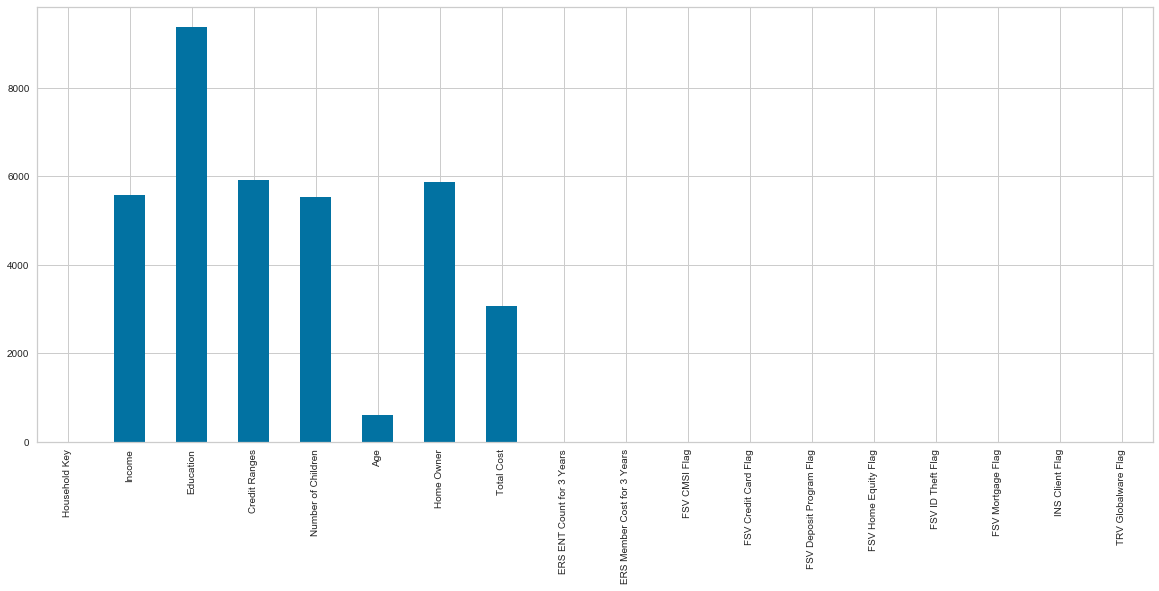

In [115]:
df_f.isna().sum().plot(kind='bar', figsize = (20,8))

In [ ]:
# out of 16675 data points
# 

In [117]:
df_csv = df_f[df_c['Member Status'] == 'CANCELLED']
df_csv.to_csv('cancelled_members.csv')

In [120]:
imputer = KNNImputer(n_neighbors=4)

In [129]:
df_imput = pd.DataFrame(imputer.fit_transform(df_f))

In [127]:
df_imput.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4500791.0,1.00,2.00,2.00,1.00,98.0,1.0,32.5000,2.0,65.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4500791.0,1.00,2.00,2.00,1.00,98.0,1.0,30.0000,2.0,65.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4500791.0,1.00,2.00,2.00,1.00,98.0,1.0,32.5000,2.0,65.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4500791.0,1.00,2.00,2.00,1.00,98.0,1.0,30.0000,2.0,65.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4500791.0,1.00,2.00,2.00,1.00,98.0,1.0,53.0000,2.0,65.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4500791.0,1.00,2.00,2.00,1.00,98.0,1.0,30.0000,2.0,65.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4500791.0,1.00,2.00,2.00,1.00,98.0,1.0,32.0000,2.0,65.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4500791.0,1.00,2.00,2.00,1.00,98.0,1.0,32.0000,2.0,65.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4500791.0,1.00,2.00,2.00,1.00,98.0,1.0,32.5000,2.0,65.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,11622991.0,2.00,1.00,4.00,0.00,64.0,1.0,58.8500,3.0,176.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
[cols for cols in df_f.columns]

['Household Key',
 'Income',
 'Education',
 'Credit Ranges',
 'Number of Children',
 'Age',
 'Home Owner',
 'Total Cost',
 'ERS ENT Count for 3 Years',
 'ERS Member Cost for 3 Years',
 'FSV CMSI Flag',
 'FSV Credit Card Flag',
 'FSV Deposit Program Flag',
 'FSV Home Equity Flag',
 'FSV ID Theft Flag',
 'FSV Mortgage Flag',
 'INS Client Flag',
 'TRV Globalware Flag']

In [150]:
houshold_grpd = df_f.groupby('Household Key').agg({'Income':'max', 'Education':'max',
                                 'Credit Ranges':'max', 'Number of Children':'max',
                                 'Age':'max', 'Home Owner':'max', 'Total Cost':'sum',
                                 'ERS ENT Count for 3 Years':'sum', 'ERS Member Cost for 3 Years':'sum',
                                 'FSV CMSI Flag':'sum', 'FSV Credit Card Flag':'sum',
                                 'FSV Deposit Program Flag':'sum', 'FSV Home Equity Flag':'sum',
                                 'FSV ID Theft Flag':'sum', 'FSV Mortgage Flag':'sum',
                                 'INS Client Flag':'sum', 'TRV Globalware Flag':'sum'})

In [151]:
X = houshold_grpd.dropna().drop('Credit Ranges', axis=1)
y = houshold_grpd.dropna()['Credit Ranges']
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
knn = KNeighborsClassifier(n_neighbors=4)
tree = DecisionTreeRegressor(max_depth=4)
lgr = LogisticRegression()
forest = RandomForestClassifier(n_estimators=100, max_depth=3)
kmeans = KMeans(n_clusters=4)
sp = SpectralClustering(n_clusters=4)



In [152]:
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
tree.fit(X_train, y_train)
lgr.fit(X_train, y_train)
forest.fit(X_train, y_train)
kmeans.fit(X_train, y_train)
sp.fit(X_train, y_train)



C:\Users\ARASH-FEA\.conda\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ARASH-FEA\.conda\envs\py37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\ARASH-FEA\.conda\envs\py37\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\ARASH-FEA\.conda\envs\py37\lib\si

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=4, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None)

In [154]:
s_lr = lr.score(X_test, y_test)
s_knn = knn.score(X_test, y_test)
s_tree = tree.score(X_test, y_test)
s_lgr = lgr.score(X_test, y_test)
s_forest = forest.score(X_test, y_test)
s_kmean = kmeans.score(X_test, y_test)
#s_sp = sp.score(X_test, y_test)

model_scores = pd.DataFrame({'LinearRegression':[s_lr],
                            'KNeighborsClassifier':[s_knn],
                            'DecisionTreeRegressor':[s_tree],
                            'LogisticRegression':[s_lgr],
                            'RandomForestClassifier':[s_forest],
                            'KMeans':[s_kmean]})

In [160]:
model_scores

,LinearRegression,KNeighborsClassifier,DecisionTreeRegressor,LogisticRegression,RandomForestClassifier,KMeans
0,0.154396,0.44,0.126114,0.5296,0.5248,-9.564998e+07


In [158]:
knn.score(X_test, y_test)

0.5248

In [166]:
y_test.value_counts(normalize =True )

4.0    0.5280
3.0    0.3504
2.0    0.1056
1.0    0.0160
Name: Credit Ranges, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

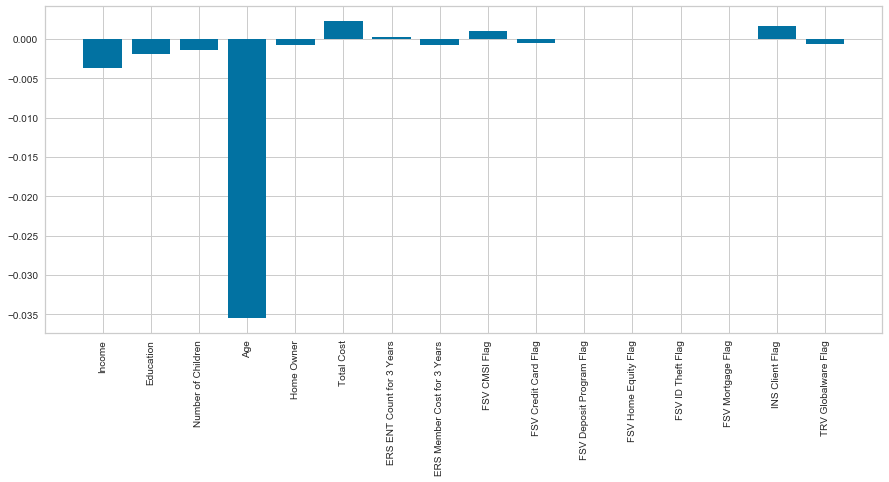

In [162]:
coef_df = pd.DataFrame({'coefs': lgr.coef_[0], 'feature': X_test.columns})
plt.figure(figsize = (15,6))
plt.bar(coef_df['feature'], coef_df['coefs'])
plt.xticks(rotation =90)

In [172]:
coef_df.nlargest(n=16, columns='coefs')

,coefs,feature
5,0.002265,Total Cost
14,0.001642,INS Client Flag
8,0.001017,FSV CMSI Flag
6,0.000272,ERS ENT Count for 3 Years
12,0.000046,FSV ID Theft Flag
11,-0.000005,FSV Home Equity Flag
13,-0.000027,FSV Mortgage Flag
10,-0.000030,FSV Deposit Program Flag
9,-0.000463,FSV Credit Card Flag
15,-0.000637,TRV Globalware Flag


In [173]:
skplt.metrics.plot_cumulative_gain(y_test, lgr.predict_proba(X_test))

ValueError: Cannot calculate Cumulative Gains for data with 4 category/ies

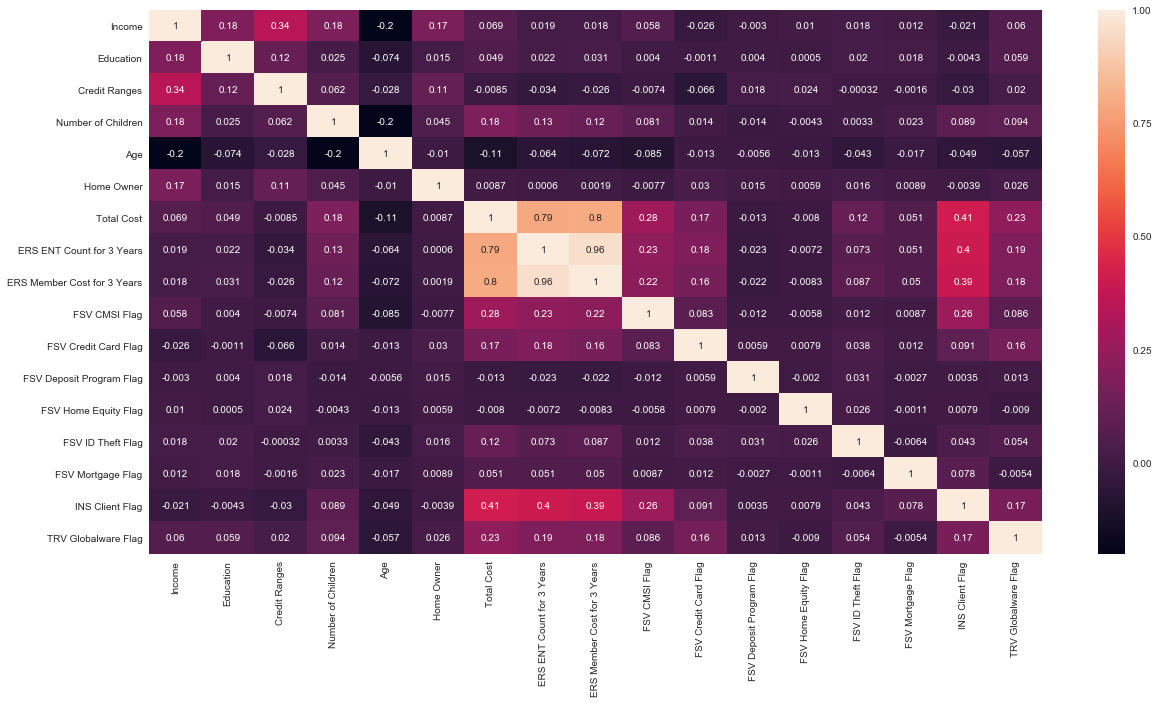

In [183]:
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(houshold_grpd.corr(), annot = True)
    

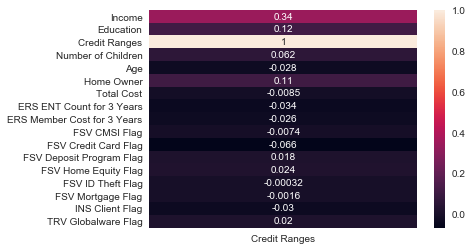

In [184]:
sns.heatmap(houshold_grpd.corr()[['Credit Ranges']], annot = True)

In [188]:
X = houshold_grpd.dropna()[['Income', 'Education', 'Number of Children', 'Age', 'Home Owner', 'FSV Credit Card Flag']]
y = houshold_grpd.dropna()['Credit Ranges']
X_train, X_test, y_train, y_test = train_test_split(X, y)
lgr = LogisticRegression()
forest = RandomForestClassifier(n_estimators=100, max_depth=3)
lgr.fit(X_train, y_train)
forest.fit(X_train, y_train)
s_lgr = lgr.score(X_test, y_test)
s_forest = forest.score(X_test, y_test)

C:\Users\ARASH-FEA\.conda\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [189]:
s_lgr, s_forest

(0.5712, 0.584)

In [ ]:
# not much better than major class (0.528)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

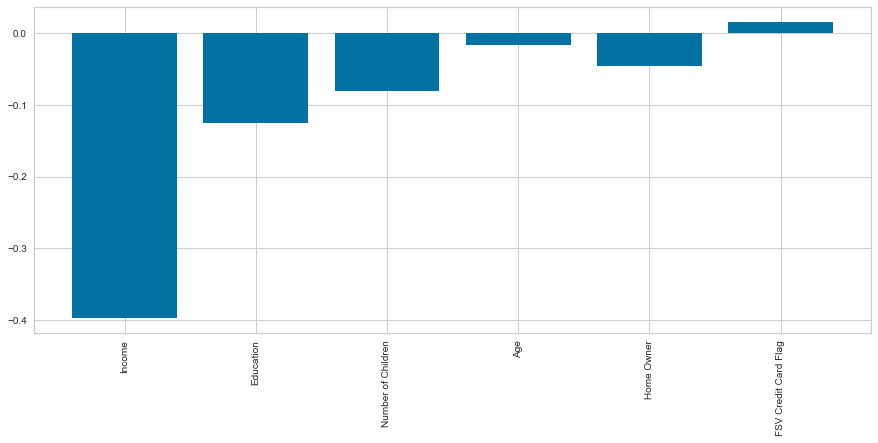

In [190]:
coef_df = pd.DataFrame({'coefs': lgr.coef_[0], 'feature': X_test.columns})
plt.figure(figsize = (15,6))
plt.bar(coef_df['feature'], coef_df['coefs'])
plt.xticks(rotation =90)

In [197]:
X = houshold_grpd.dropna()[['Income', 'Education', 'Number of Children', 'Home Owner']]
y = houshold_grpd.dropna()['Credit Ranges']
X_train, X_test, y_train, y_test = train_test_split(X, y)
lgr = LogisticRegression()
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
lgr.fit(X_train, y_train)
forest.fit(X_train, y_train)
s_lgr = lgr.score(X_test, y_test)
s_forest = forest.score(X_test, y_test)

In [198]:
s_lgr, s_forest

(0.5648, 0.5616)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

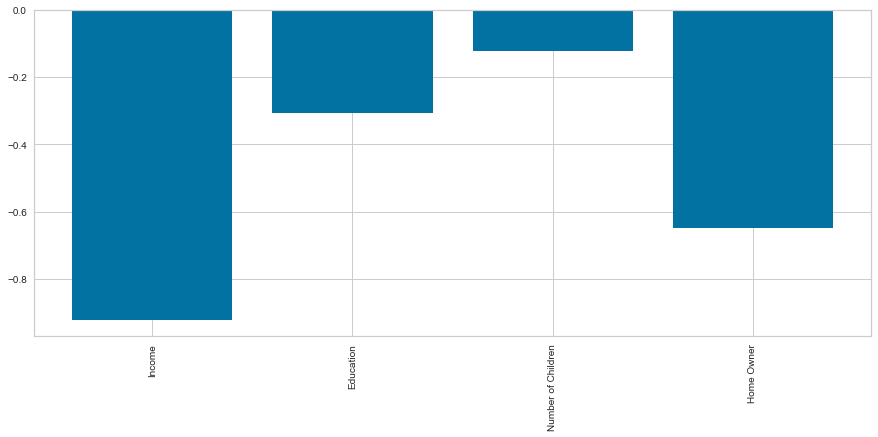

In [199]:
coef_df = pd.DataFrame({'coefs': lgr.coef_[0], 'feature': X_test.columns})
plt.figure(figsize = (15,6))
plt.bar(coef_df['feature'], coef_df['coefs'])
plt.xticks(rotation =90)

In [ ]:
risky_cars = pd.get_dummies(data[['Household Key', 'ERS Member Cost for 3 Years', 'SC Vehicle Manufacturer Name']])